<a href="https://colab.research.google.com/github/Tenntucky/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Kole_Goldsberry_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
def MeanVarianceStandardDev(numbers):
    
    l_numbers = len(numbers)    
    
    mean = reduce(lambda x, y: x+y, numbers) / l_numbers    # Mean
    # 3052
    
    variance = 0
    for i in range(l_numbers):
      v = (numbers[i] - mean)**2
      variance += v / l_numbers
      
    standard_deviation = variance**(1/2)
    mvs = ('mean:', mean, 'variance:', variance, 'standard deviation:', 
           standard_deviation)
    
    check = np.var(numbers)
    check2 = np.std(numbers)
    
    return  mvs, check, check2

sales = MeanVarianceStandardDev([3505, 2400, 3027, 2798, 3700, 3250, 2689])

print(sales)


(('mean:', 3052.714285714286, 'variance:', 183761.0612244898, 'standard deviation:', 428.67360686714756), 183761.06122448976, 428.67360686714756)


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [4]:
customers = [127, 80, 105, 92, 120, 115, 93]

customers_mean = np.mean(customers)

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales_mean = np.mean(sales)
l_data = len(customers)

covar_sum = 0
for i in range(l_data):
  covar = (customers[i] - customers_mean)*(sales[i] - sales_mean)
  covar_sum += covar
  
covariance = covar_sum/(l_data - 1)
print('Covariance:',covariance)
covariance_check = np.cov(customers, sales)
print(covariance_check)

Covariance: 7604.357142857142
[[   290.95238095   7604.35714286]
 [  7604.35714286 214387.9047619 ]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [5]:
def standardDev(numbers):
  
  l_numbers = len(numbers)    
    
  mean = reduce(lambda x, y: x+y, numbers) / l_numbers    # Mean
  # 3052
    
  variance = 0
  for i in range(l_numbers):
    v = (numbers[i] - mean)**2
    variance += v / l_numbers
      
  standard_deviation = variance**(1/2)
  
  return standard_deviation

customers_std = standardDev(customers)
print(customers_std)
std_check = np.std(customers)
print(std_check)

sales_std = standardDev(sales)
print(sales_std)
std_check2 = np.std(sales)
print(std_check2)

correction_coef = np.corrcoef(customers, sales)
print(correction_coef)

15.792015549069118
15.792015549069118
428.67360686714756
428.67360686714756
[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [6]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [14]:
df.describe(exclude='numbers')

TypeError: ignored

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

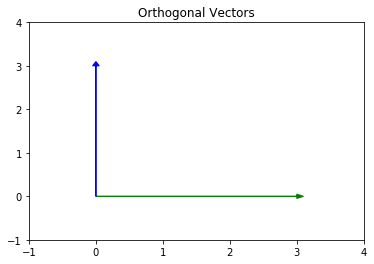

In [16]:
v1 = [3, 0]
v2 = [0, 3]

plt.arrow(0, 0, v1[0], v1[1], head_width=0.1, head_length=0.1, color='green')
plt.arrow(0, 0, v2[0], v2[1], head_width=0.1, head_length=0.1, color='blue')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.title('Orthogonal Vectors')
plt.show();
# To be orthogonal is to be perpindicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [22]:
a = [-5, 3, 7]
b = [6, -8, 2]

a_t = np.transpose(a)
b_t = np.transpose(b)

print(a_t)
print(b_t)

a_i = a*a_t
b_i = b*b_t

print(a_i)
print(b_i)

orth = np.dot(a, b)
print(orth)
# No these vectors are not orthogonal themselves or to each other.

[-5  3  7]
[ 6 -8  2]
[25  9 49]
[36 64  4]
-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [29]:
c = [2, -15, 6, 20]
c_t = np.transpose(c)

mag_c = np.sqrt(2**2 + (-15)**2 + 6**2 + 20**2)
mag_c_sq = mag_c**2

c_dot = np.dot(c, c)

c_t_c = c*c_t
c_t_c_sq = np.sqrt(c_t_c)

print(mag_c_sq)
print(c_dot)
print(c_t_c)
# They are all the same, or at different levels of similarity.
# e.g. if you add c_t_c vector components you'll get 665
# 400 + 36 + 225 + 4 = 665

665.0
665
[  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [30]:
f = [4, 12, 11, 9, 2]

unit_vector_f = '4i + 12j + 11k + 9m + 2n'

print(unit_vector_f)

4i + 12j + 11k + 9m + 2n


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

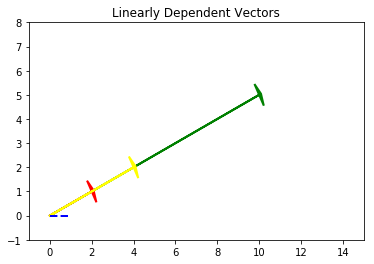

In [39]:
v1 = [2, 1]
v11 = np.multiply(5, v1)
v12 = np.multiply(2, v1)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='blue', linewidth=2)
plt.arrow(0, 0, v11[0], v11[1], linewidth=2, head_width=1, head_length=0.1, color='green')
plt.arrow(0, 0, v1[0], v1[1], linewidth=2, head_width=1, head_length=0.1, color='red')
plt.arrow(0, 0, v12[0], v12[1], linewidth=2, head_width=1, head_length=0.1, color='yellow')
plt.xlim(-1, 15)
plt.ylim(-1, 8)
plt.title('Linearly Dependent Vectors')
plt.show();

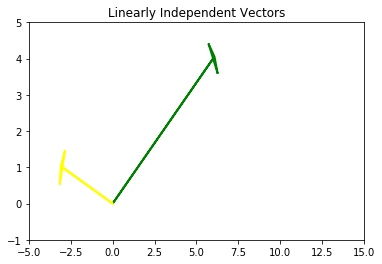

In [49]:
v1 = [3, 2]
v11 = np.multiply(2, v1)

v2 = [-1.5, 0.5]
v12 = np.multiply(2, v2)

plt.arrow(0, 0, v11[0], v11[1], linewidth=2, head_width=1, head_length=0.1, color='green')
plt.arrow(0, 0, v12[0], v12[1], linewidth=2, head_width=1, head_length=0.1, color='yellow')
plt.xlim(-5, 15)
plt.ylim(-1, 5)
plt.title('Linearly Independent Vectors')
plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# Um...two?

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# I would guess three? Three constants?

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



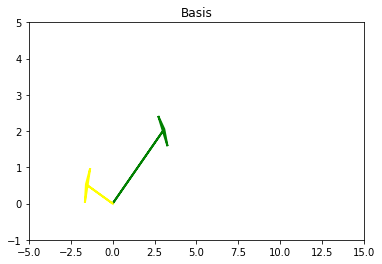

In [50]:
v1 = [3, 2]

v2 = [-1.5, 0.5]

plt.arrow(0, 0, v1[0], v1[1], linewidth=2, head_width=1, head_length=0.1, color='green')
plt.arrow(0, 0, v2[0], v2[1], linewidth=2, head_width=1, head_length=0.1, color='yellow')
plt.xlim(-5, 15)
plt.ylim(-1, 5)
plt.title('Basis')
plt.show();

## 6.2 What does it mean to form a basis?

The vectors must be linearly independent. The vectors must also fill the span in the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = [[1, 2, 3],
     [-1, 0, 7],
     [4, 8, 2]]
# Add the first row to the second row
p = [[1, 2, 3],
     [0, 2, 10],
     [4, 8, 2]]
# Add -4 times the first row to the third row
p = [[1, 2, 3],
     [0, 2, 10],
     [0, 0, -10]]
# Multiply the second row by 1/2
p = [[1, 2, 3],
     [0, 1, 5],
     [0, 0, -10]]
# Multiply the third row by -1/10
p = [[1, 2, 3],
     [0, 1, 5],
     [0, 0, 1]]

Rank is 1

## 7.2 What does the rank of a matrix tell us?

This matrix can only span R and not R^3 as it is written.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

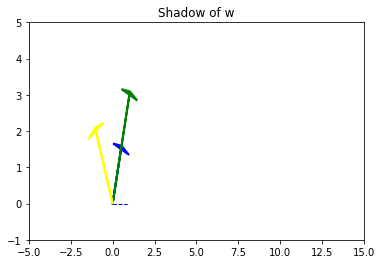

[0.5 1.5]


In [55]:
v = np.array([1, 3])
w = np.array([-1, 2])
proj = np.dot(v, w)/np.dot(v, v)*v

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=2, head_width=1, head_length=0.1, color='blue')
plt.arrow(0, 0, v[0], v[1], linewidth=2, head_width=1, head_length=0.1, color='green')
plt.arrow(0, 0, w[0], w[1], linewidth=2, head_width=1, head_length=0.1, color='yellow')
plt.xlim(-5, 15)
plt.ylim(-1, 5)
plt.title('Shadow of w')
plt.show();
print(proj)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

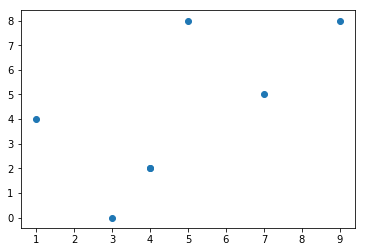

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()